Avocado Project
Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
Some relevant columns in the dataset:
•	Date - The date of the observation
•	AveragePrice - the average price of a single avocado
•	type - conventional or organic
•	year - the year
•	Region - the city or region of the observation
•	Total Volume - Total number of avocados sold
•	4046 - Total number of avocados with PLU 4046 sold
•	4225 - Total number of avocados with PLU 4225 sold
•	4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 




In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Libraries for Model Bulding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error

In [2]:
# Loading the data
Ava=pd.read_csv('avocado.csv')
Ava.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [3]:
# renaming column names 
Ava = Ava.rename(columns={'4046':'PLU_4046','4225':'PLU_4225','4770':'PLU_4770'})

In [4]:
Ava.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [5]:
Ava.shape

(16468, 14)

In [6]:
Ava.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   PLU_4046      1517 non-null   float64
 5   PLU_4225      1517 non-null   float64
 6   PLU_4770      1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


In [7]:
Ava.isnull().sum()


Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
PLU_4046        14951
PLU_4225        14951
PLU_4770        14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [8]:
# removing unnecessary column
Ava = Ava.drop(['Unnamed: 0'],axis = 1)
Ava.head(10)

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
5,22-11-2015,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015.0,Albany
6,15-11-2015,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015.0,Albany
7,08-11-2015,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015.0,Albany
8,01-11-2015,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015.0,Albany
9,25-10-2015,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015.0,Albany


In [9]:
# convert the type of Date feature from obj to datetime type
Ava['Date'] = pd.to_datetime(Ava['Date'])
Ava.head()

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [11]:
Ava.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,1517.0,1.074990e+00,1.888912e-01,0.49,0.98,1.08,1.19,1.68
Total Volume,1517.0,1.601879e+06,4.433143e+06,38750.74,147469.99,402791.86,981975.08,44655461.51
PLU_4046,1517.0,6.464387e+05,1.947614e+06,467.72,20400.34,81751.17,377578.48,18933038.04
PLU_4225,1517.0,6.114375e+05,1.672906e+06,1783.77,41476.06,118664.89,485150.34,18956479.74
PLU_4770,1517.0,5.040550e+04,1.377812e+05,0.00,911.25,7688.17,29167.30,1381516.11
Total Bags,1517.0,2.935974e+05,7.579765e+05,3311.77,36206.89,73979.06,157609.68,6736304.04
Small Bags,1517.0,2.487736e+05,6.474765e+05,3311.77,29727.22,62375.69,146199.35,5893641.72
Large Bags,1517.0,4.264205e+04,1.182157e+05,0.00,540.74,5044.35,29267.67,1121076.47
XLarge Bags,1517.0,2.181771e+03,7.455712e+03,0.00,0.00,0.00,401.48,108072.79
year,1517.0,2.015163e+03,3.693244e-01,2015.00,2015.00,2015.00,2015.00,2016.00


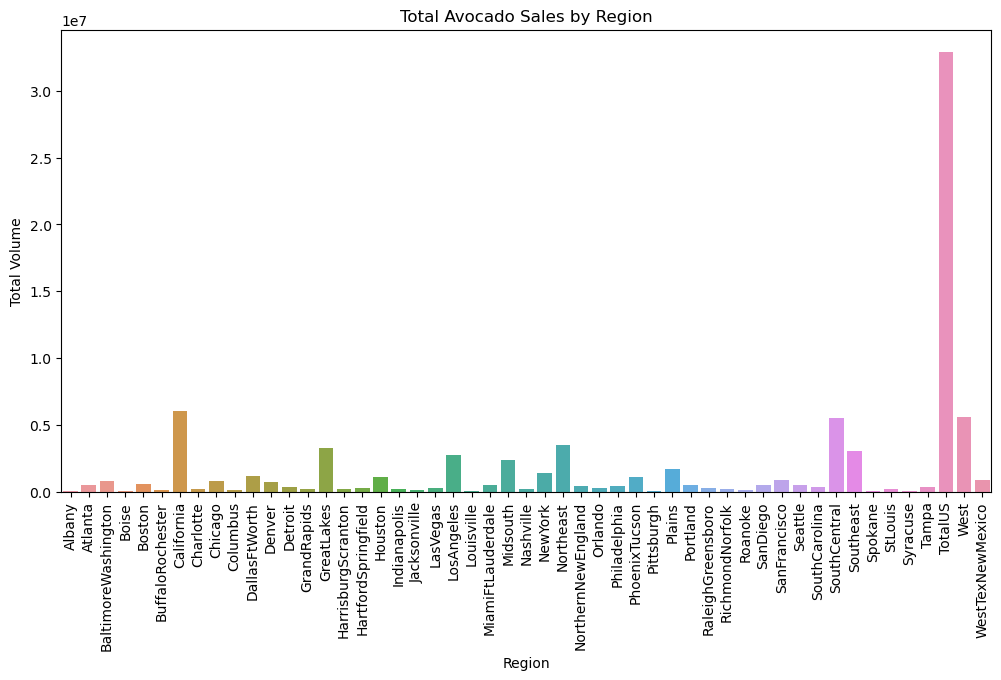

In [12]:
# Bar plot of total avocado sales by region
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='Total Volume', data=Ava, ci=None)
plt.title('Total Avocado Sales by Region')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Total Volume')
plt.show()

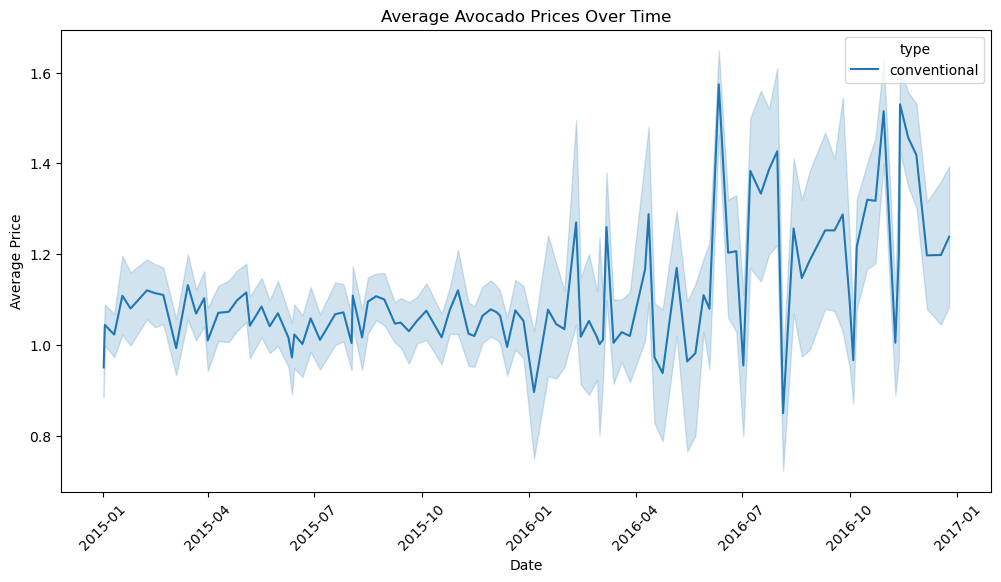

In [13]:
# Line plot of average avocado prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='AveragePrice', hue='type', data=Ava)
plt.title('Average Avocado Prices Over Time')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()

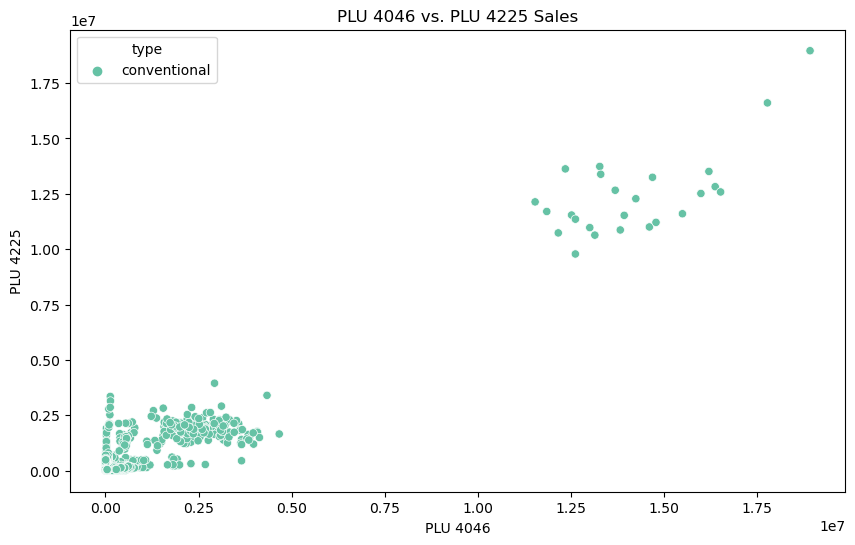

In [14]:
# Scatter plot of PLU 4046 vs. PLU 4225 sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PLU_4046', y='PLU_4225', data=Ava, hue='type', palette='Set2')
plt.title('PLU 4046 vs. PLU 4225 Sales')
plt.xlabel('PLU 4046')
plt.ylabel('PLU 4225')
plt.show()

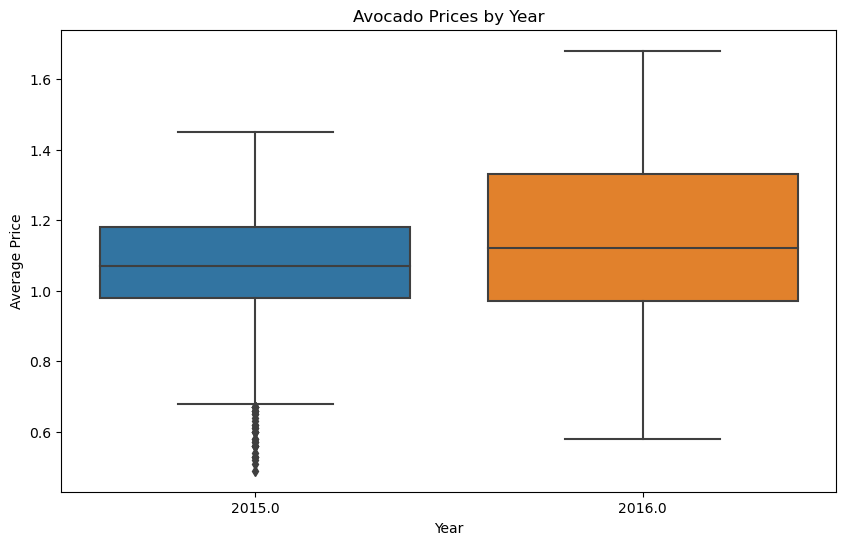

In [15]:
# Box plot of avocado prices by year
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='AveragePrice', data=Ava)
plt.title('Avocado Prices by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

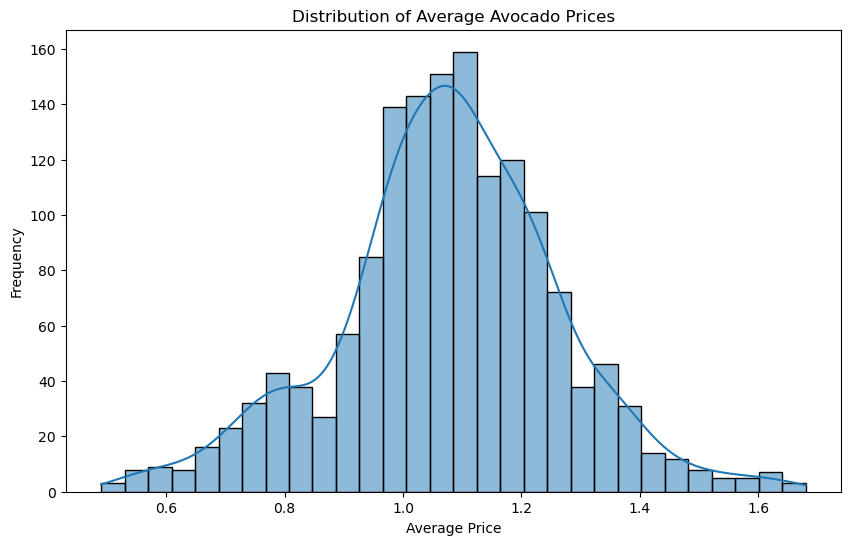

In [16]:
# Histogram of Average Avocado Prices
plt.figure(figsize=(10, 6))
sns.histplot(Ava['AveragePrice'], bins=30, kde=True)
plt.title('Distribution of Average Avocado Prices')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.show()

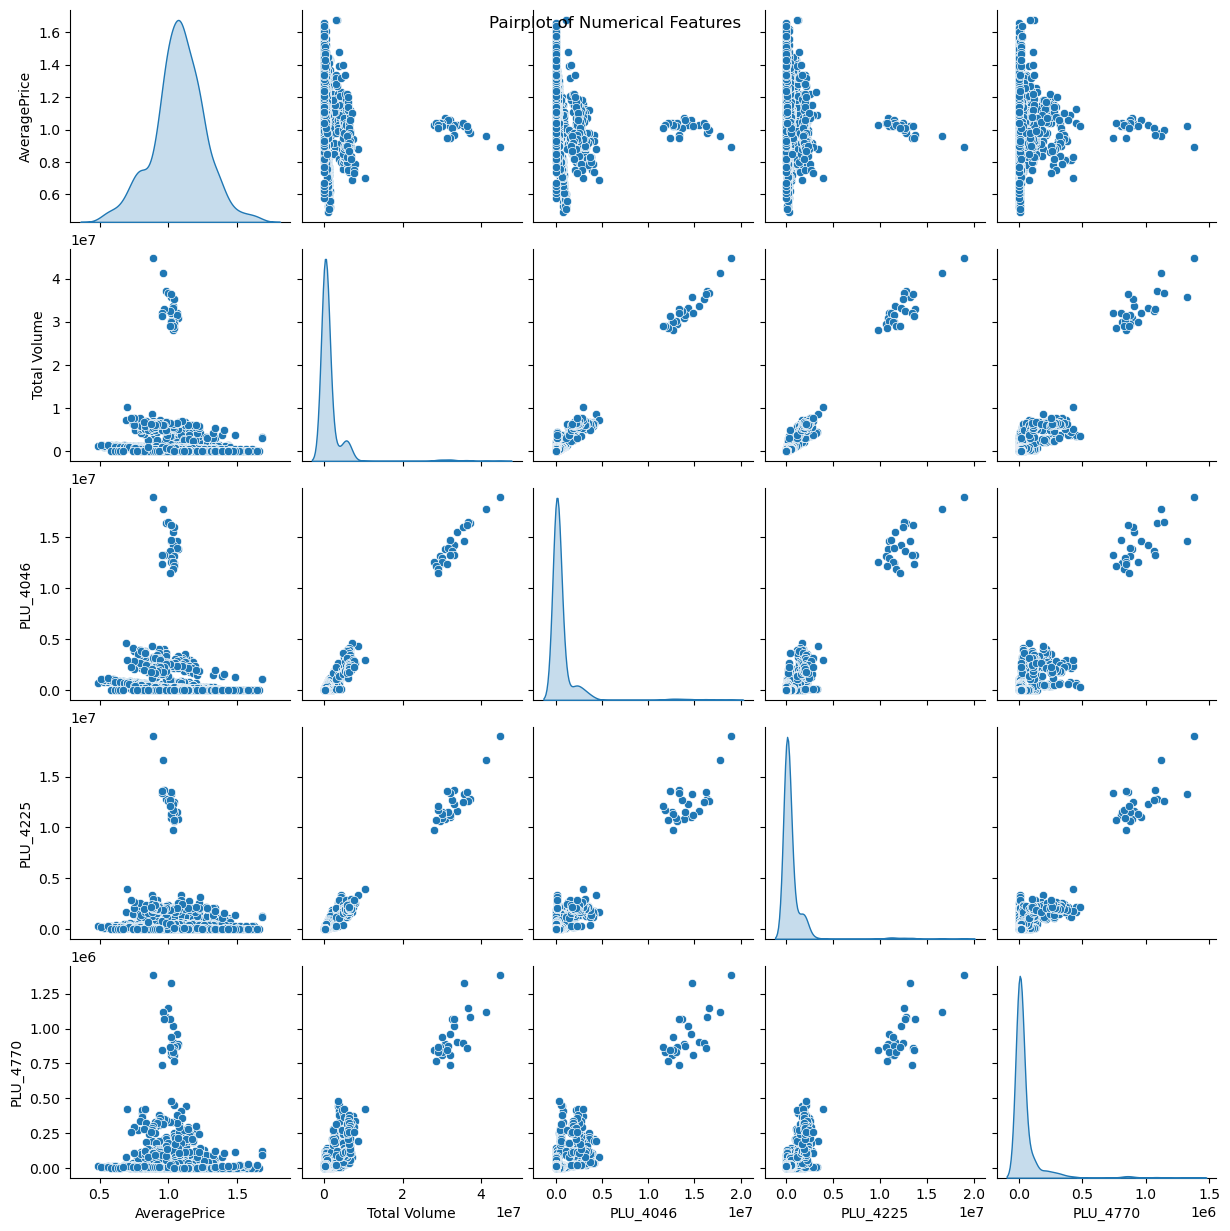

In [17]:
# Pairplot to visualize relationships between numerical features
sns.pairplot(Ava[['AveragePrice', 'Total Volume', 'PLU_4046', 'PLU_4225', 'PLU_4770']], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features')
plt.show()


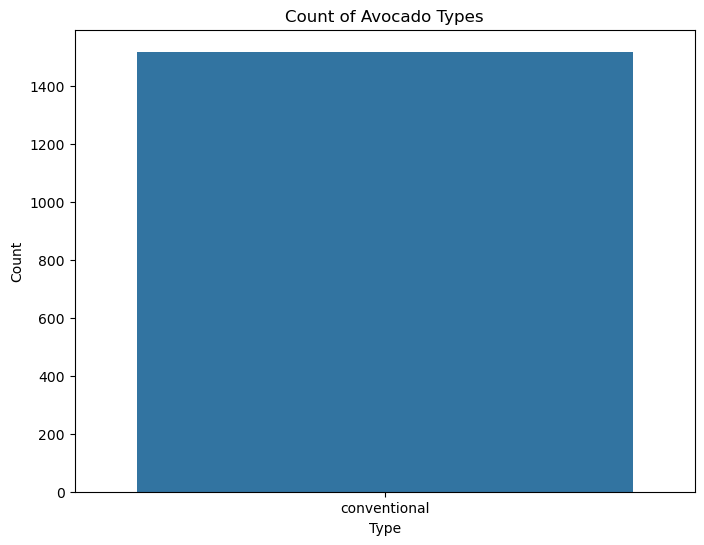

In [18]:
# Countplot of avocado type
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=Ava)
plt.title('Count of Avocado Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


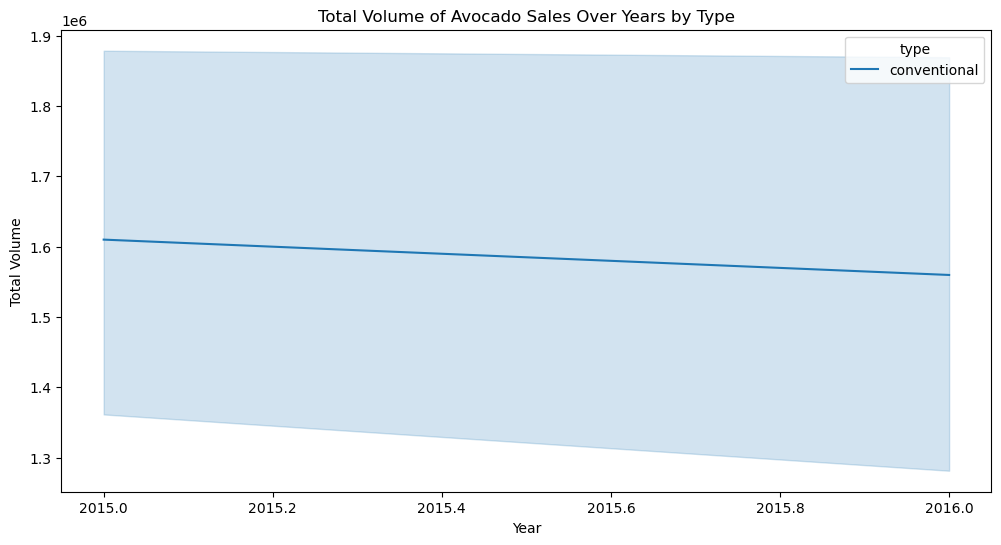

In [19]:
# Line plot of Total Volume by year for each avocado type
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='Total Volume', hue='type', data=Ava)
plt.title('Total Volume of Avocado Sales Over Years by Type')
plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.show()

Missing Value And Nan Value Treatment

In [20]:
# Separate columns by data type
numerical_columns = Ava.select_dtypes(include=['number']).columns.tolist()
categorical_columns = Ava.select_dtypes(exclude=['number']).columns.tolist()

# Display the lists of numerical and categorical columns
print("Numerical Columns:")
print(numerical_columns)

print("\nCategorical Columns:")
print(categorical_columns)

Numerical Columns:
['AveragePrice', 'Total Volume', 'PLU_4046', 'PLU_4225', 'PLU_4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']

Categorical Columns:
['Date', 'type', 'region']


In [21]:
# Check for NaN values in numerical columns
numerical_nan_values = Ava[numerical_columns].isna().sum()

In [22]:
# Check for NaN values in numerical columns
numerical_nan_values 

AveragePrice    14951
Total Volume    14951
PLU_4046        14951
PLU_4225        14951
PLU_4770        14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
year            14951
dtype: int64

In [23]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')  # Use 'mean' or other strategies as needed
Ava[numerical_columns] = imputer.fit_transform(Ava[numerical_columns])

In [24]:
for column in Ava.columns:
    Ava[column + '_is_missing'] = Ava[column].isna().astype(int)

In [25]:
# Check for NaN values in categorical columns
categorical_nan_values = Ava[categorical_columns].isna().sum()

In [26]:
categorical_nan_values

Date      14951
type      14951
region    14951
dtype: int64

In [27]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')  # Use 'mean' or other strategies as needed
Ava[numerical_columns] = imputer.fit_transform(Ava[numerical_columns])

In [28]:
imputer = SimpleImputer(strategy='most_frequent')
Ava[categorical_columns] = imputer.fit_transform(Ava[categorical_columns])

In [29]:
Ava.dropna(inplace=True)

In [30]:
# Encode the 'type' column (Classification)
le = LabelEncoder()
Ava['type_encoded'] = le.fit_transform(Ava['type'])

In [31]:
Ava.head(3)

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,PLU_4225_is_missing,PLU_4770_is_missing,Total Bags_is_missing,Small Bags_is_missing,Large Bags_is_missing,XLarge Bags_is_missing,type_is_missing,year_is_missing,region_is_missing,type_encoded
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,...,0,0,0,0,0,0,0,0,0,0


# Model Building

In [32]:
# Split the dataset into features and labels
X = Ava[[ 'Total Volume', 'PLU_4046', 'PLU_4225', 'PLU_4770', 'type_encoded']]
y = Ava['region']

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


In [35]:
# Standardize the features
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# CLASSIFICATION MODEL

In [36]:
# Classification model (Random Forest)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
# Classification model evaluation
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy:.2f}")


Classification Accuracy: 0.99


In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate and print various classification metrics for multiclass classification
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99
Confusion Matrix:
[[15  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ...  3  0  0]
 [ 0  0  0 ...  0  6  0]
 [ 0  0  0 ...  0  0  3]]


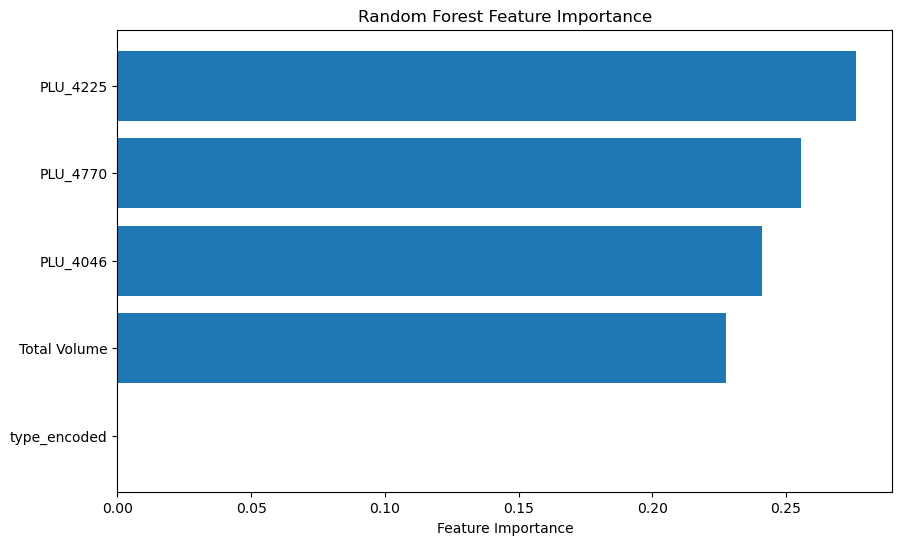

In [40]:
feature_importances = clf.feature_importances_
feature_names = X.columns  
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

# Regression Model

In [41]:
X_reg = Ava[['year', 'Total Volume', 'PLU_4046', 'PLU_4225', 'PLU_4770']]
y_reg = Ava['AveragePrice']

In [42]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [43]:
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)


In [44]:
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_reg, y_train_reg)

RandomForestRegressor(random_state=42)

In [46]:
# Regression model evaluation
y_pred_reg = reg.predict(X_test_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
print(f"Regression MAE: {mae:.2f}")

Regression MAE: 0.01


In [47]:
feature_importances = reg.feature_importances_
feature_importances

array([0.05491516, 0.21047151, 0.45293685, 0.11581172, 0.16586476])

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    # Add more hyperparameters to tune
}

grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train_reg, y_train_reg)

best_params = grid_search.best_params_
best_reg = grid_search.best_estimator_

In [51]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(reg, X_train_reg, y_train_reg, cv=5, scoring='neg_mean_absolute_error')
avg_cv_mae = -cv_scores.mean()

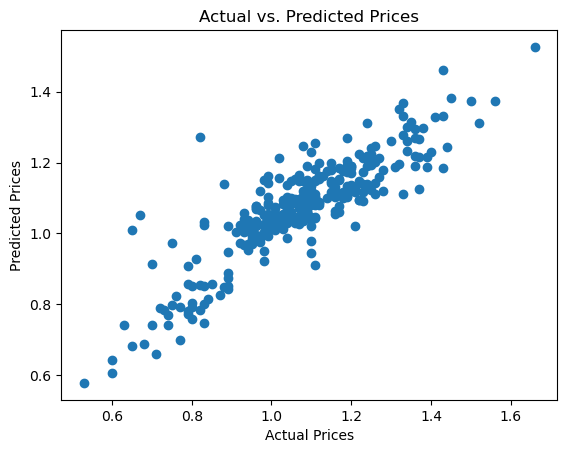

In [53]:
# Example scatter plot
plt.scatter(y_test_reg, y_pred_reg)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()


In [54]:
import joblib

# Save the model to a file
joblib.dump(clf, 'random_forest_model_Classification.pkl')

# To load the model later
loaded_model = joblib.load('random_forest_model_Classification.pkl')

In [55]:
import joblib

# Save the model to a file
joblib.dump(reg, 'random_forest_model_Regression.pkl')

# To load the model later
loaded_model = joblib.load('random_forest_model_Regression.pkl')